### Load data

In [1]:
import pandas as pd
import numpy as np
import joblib
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from lightgbm.sklearn import LGBMClassifier

In [2]:
# Load dataset 
df = joblib.load('mag_order_merged_three_classes.pkl')

# Define features and target variable
features = joblib.load('features_three_classes.pkl')

print('No. of features', len(features))

df.head()

No. of features 3983


,minimum_oxidation_state,maximum_oxidation_state,range_oxidation_state,std_dev_oxidation_state,compound_possible,max_ionic_char,avg_ionic_char,avg_anion_electron_affinity,minimum_EN_difference,maximum_EN_difference,...,crystal_system_ohe_monoclinic,crystal_system_ohe_orthorhombic,crystal_system_ohe_tetragonal,crystal_system_ohe_triclinic,crystal_system_ohe_trigonal,energy_per_atom,energy_above_ground_state_per_atom,energy_diff_relax_static,total_magnetization,mag_order
0,-2,3,5,3.273268,1,0.745613,0.151694,-282000.0,1.610,2.340,...,0,0,0,0,1,-7.639507,0.0,-0.000030,0.000000,1
1,-2,3,5,3.230291,1,0.745613,0.122247,-282000.0,1.540,2.340,...,0,0,0,0,0,-6.342495,0.0,-0.000002,0.000023,1
2,-2,5,7,4.082483,1,0.559139,0.015532,-282000.0,1.810,1.810,...,0,1,0,0,0,-7.782158,0.0,0.000058,2.006047,0
3,-2,3,5,2.626785,1,0.745613,0.145835,-325200.0,1.534,1.984,...,0,0,1,0,0,-7.443381,0.0,-0.000077,0.000000,1
4,0,0,0,0.000000,1,0.787757,0.124430,0.0,0.000,0.000,...,0,0,0,0,1,-6.010237,0.0,-0.000130,8.996959,2


In [3]:
target = 'mag_order'
print(target)

mag_order


### Split & Scale Features

In [4]:
!cd

c:\Users\songy\OneDrive\Documents\GBSFS4MPP_local\new_properties\7. mag_order


In [5]:
# Split dataset
df_train, df_test = train_test_split(
                                    df, 
                                    test_size=0.2, 
                                    stratify=df[target].tolist(), 
                                    random_state=42
                                    ) 

In [6]:
# Save unscaled data
joblib.dump(df_train, target + '_results/' + 'df_train_' + str(target) + '.pkl')
joblib.dump(df_test, target + '_results/' + 'df_test_' + str(target) + '.pkl')

['mag_order_results/df_test_mag_order.pkl']

In [7]:
# Scale the features
scaling = MinMaxScaler(feature_range=(0, 1))

df_train[features] = pd.DataFrame(
                                    scaling.fit_transform(df_train[features].values),
                                    columns=df_train[features].columns,
                                    index=df_train[features].index
                                )
                                

# Create pandas.Dataframe of scaled test set using scaler as defined using training set                           
df_test[features] = pd.DataFrame(
                                    scaling.transform(df_test[features].values),
                                    columns=df_test[features].columns,
                                    index=df_test[features].index
                                )

c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [8]:
# Save 
joblib.dump(df_train, target + '_results/' + 'df_train_' + str(target) + '_scaled.pkl')
joblib.dump(df_test, target + '_results/' +  'df_test_' + str(target) + '_scaled.pkl')

['mag_order_results/df_test_mag_order_scaled.pkl']

#### GBFS

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import GBFS as gb

import joblib
import pandas as pd

In [2]:
# Target
target = 'mag_order'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/7. mag_order/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + str(target) + '_scaled.pkl'

# Either a list or saved file
features = path + 'features_three_classes.pkl'

problem = 'classification'

In [3]:
# Initialization 
FS = gb.GBFS(
            path_to_file = path_to_file, 
            path_to_save = path_to_save, 
            target = target,
            features = features,
            oversampled_it = True, 
            problem = problem,
            target_classes=3
            )

Name of target column:  mag_order
No. of exploratory features:  3983


In [4]:
# Conduct grid search to perform preliminary scan of the hyperparameter space & retrieve a trained model
FS.run(
        boosting_method = 'lightGBM', 
        objective='multiclass', 
        oversample_technique='smoothed_ros',
        cv_folds = 1
        )

Model employed:  lightGBM
Total no. of permutations: 18


   (1 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 30)]
   No. of rows in the training set: 2940

   Oversampling training data...
   No. of rows in training set after oversampling: 3603
   Metric score:  0.76627
   [*** Current optimal Hyperparameters ***]
Finished loading model, total used 100 iterations


   (2 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 40)]
   No. of rows in the training set: 2940

   Oversampling training data...
   No. of rows in training set after oversampling: 3603
   Metric score:  0.74329


   (3 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 50)]
   No. of rows in the training set: 2940

   Oversampling training data...
   No. of rows in training set after oversampling: 3603
   Metric score:  0.72894


   (4 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.2), ('num_leaves', 30)]
  

LGBMClassifier(importance_type='gain', learning_rate=0.2, n_estimators=300,
               num_leaves=40, objective='multiclass')

Result saved as: feature_relevance_score_mag_order.pkl
Figure saved as: feature_relevance_plot_mag_order.png


,feature,relevance_score
0,HOMO_element_ohe_Mo,1609.295013
1,OFM_d4__d8,738.561793
2,avg_ionic_char,613.434711
3,OFM_f14__s1,464.437798
4,structural_complexity_per_cell,451.708081
...,...,...
3978,OFM_p3__f5,0.000000
3979,OFM_p3__f4,0.000000
3980,OFM_p3__f3,0.000000
3981,OFM_p3__f2,0.000000


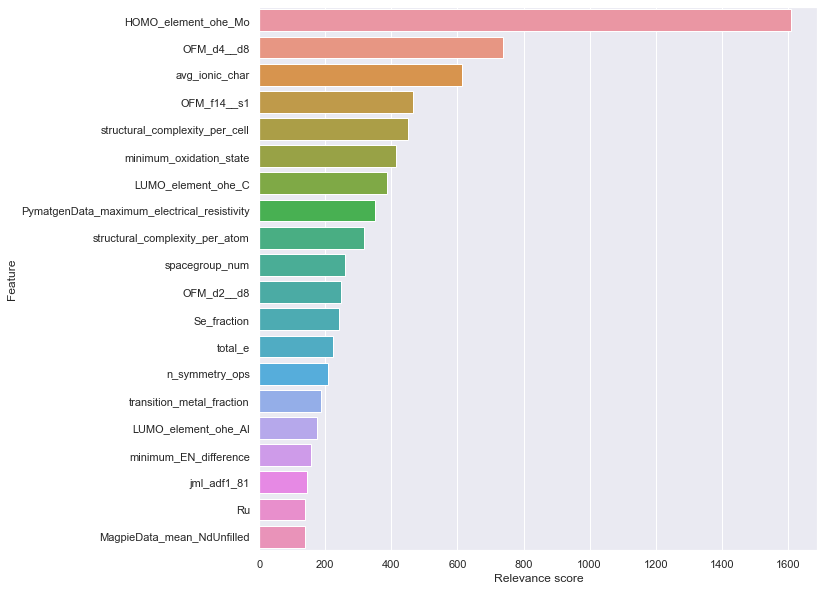

In [5]:
# Obtain feature relevance score
FS.feature_relevance(
                    plot = True, 
                    no_of_features = 20
                    )

In [6]:
# Perform recursive feature selection 
FS.recursive_selection(
                    stratify = True, 
                    oversample_technique = 'smoothed_ros', 
                    chosen_metric = 'f1_score',
                    average = 'weighted',
                    no_to_terminate = 200,
                    max_no_imp = 10
                    )

   No. of rows in training set:  2940
No. of features considering:  1

n=1: train_acc=0.4085, validation_acc=0.4082 

n=1: train_b_acc=0.3333, validation_b_acc=0.3333 

n=1: train_hl=0.5915 validation_hl=0.5918 

n=1: train_f1=0.2370, validation_f1=0.2366 

n=1: train_roc_auc=0.5000, validation_roc_auc=0.5000 

n=1: train_avg_precision)=0.3656, validation_avg_precision)=0.3657 

--- 0.04904437065124512 seconds --- 

No. of features considering:  2

n=2: train_acc=0.4085, validation_acc=0.4082 

n=2: train_b_acc=0.3333, validation_b_acc=0.3333 

n=2: train_hl=0.5915 validation_hl=0.5918 

n=2: train_f1=0.2370, validation_f1=0.2366 

n=2: train_roc_auc=0.5000, validation_roc_auc=0.5000 

n=2: train_avg_precision)=0.3656, validation_avg_precision)=0.3657 

--- 0.046042680740356445 seconds --- 

No. of features considering:  3

n=3: train_acc=0.5935, validation_acc=0.4803 

n=3: train_b_acc=0.5323, validation_b_acc=0.4240 

n=3: train_hl=0.4065 validation_hl=0.5197 

n=3: train_f1=0.5794, 

,train_acc,validation_acc,train_b_acc,validation_b_acc,train_hamming,validation_hamming,train_avg_precision,validation_avg_precision,train_roc_auc,validation_roc_auc,train_f1,validation_f1
no_of_features,,,,,,,,,,,,
1,0.408503,0.408163,0.333333,0.333333,0.591497,0.591837,0.365577,0.365724,0.500000,0.500000,0.236954,0.236616
2,0.408503,0.408163,0.333333,0.333333,0.591497,0.591837,0.365577,0.365724,0.500000,0.500000,0.236954,0.236616
3,0.593537,0.480272,0.532301,0.424022,0.406463,0.519728,0.631704,0.462109,0.769264,0.618907,0.579365,0.464210
4,0.601020,0.485714,0.536746,0.428467,0.398980,0.514286,0.644420,0.464782,0.774874,0.620312,0.585189,0.469188
5,0.938435,0.447619,0.936433,0.402226,0.061565,0.552381,0.989325,0.455544,0.993316,0.608617,0.938422,0.440338
...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.000000,0.642177,1.000000,0.584513,0.000000,0.357823,1.000000,0.742192,1.000000,0.822836,1.000000,0.626139
196,1.000000,0.628571,1.000000,0.560197,0.000000,0.371429,1.000000,0.739899,1.000000,0.819699,1.000000,0.605491
197,1.000000,0.639456,1.000000,0.563865,0.000000,0.360544,1.000000,0.738027,1.000000,0.819973,1.000000,0.611997


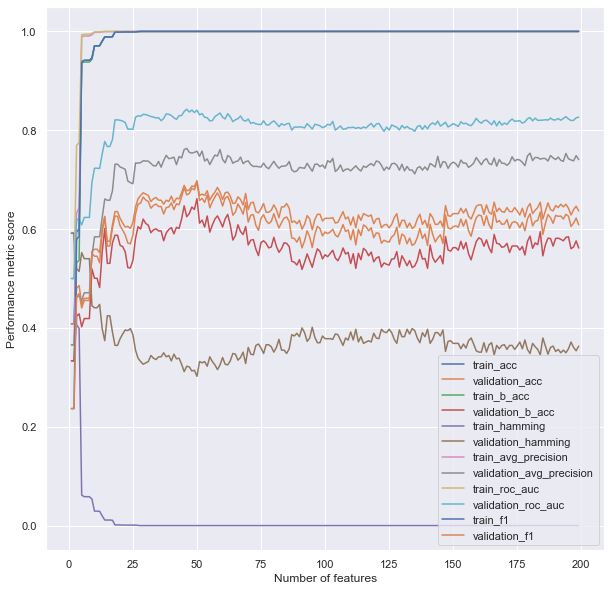

Result saved as: GBFS_convergence_plot_mag_order.pkl


<Figure size 720x720 with 0 Axes>

In [13]:
# Plot the result
FS.convergence_plot()

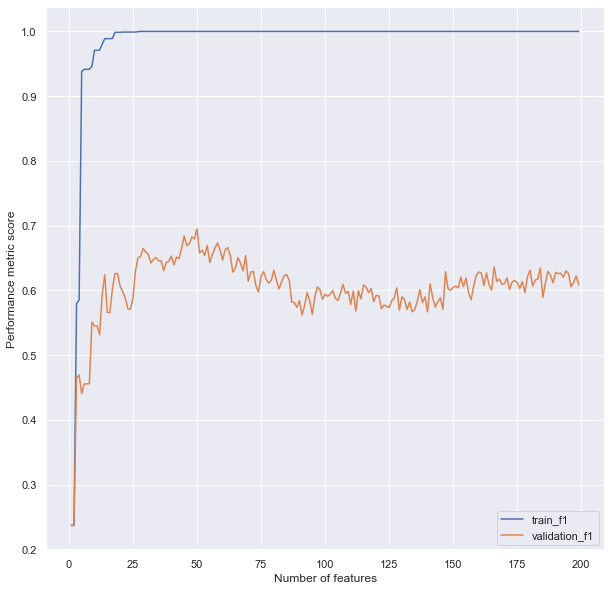

Result saved as: GBFS_convergence_plot_mag_order.pkl


<Figure size 720x720 with 0 Axes>

In [8]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_f1',
                    validation_metric = 'validation_f1'
                    )

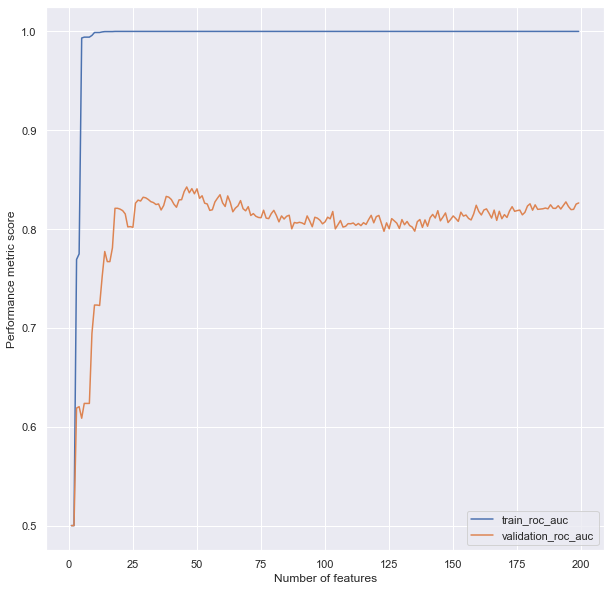

Result saved as: GBFS_convergence_plot_mag_order.pkl


<Figure size 720x720 with 0 Axes>

In [9]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_roc_auc',
                    validation_metric = 'validation_roc_auc'
                    )

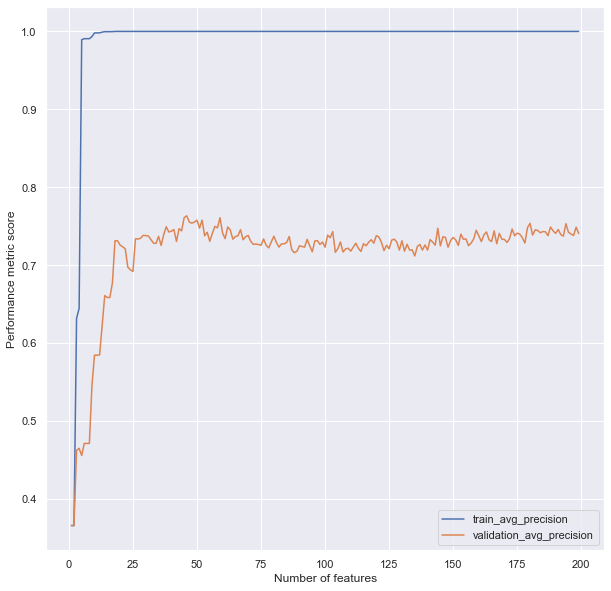

Result saved as: GBFS_convergence_plot_mag_order.pkl


<Figure size 720x720 with 0 Axes>

In [10]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_avg_precision',
                    validation_metric = 'validation_avg_precision'
                    )

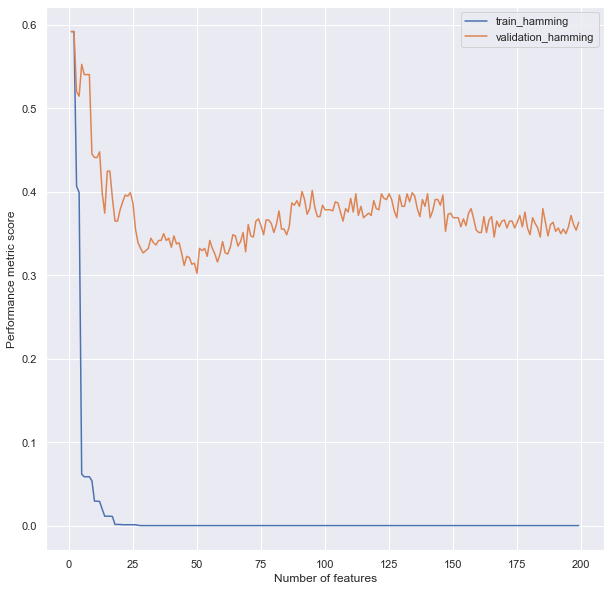

Result saved as: GBFS_convergence_plot_mag_order.pkl


<Figure size 720x720 with 0 Axes>

In [11]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_hamming',
                    validation_metric = 'validation_hamming'
                    )

In [12]:
# # Plot the result
# FS.convergence_plot(
#                     train_metric = ['train_r_sq', 'train_rmse', 'train_mae'],
#                     validation_metric = ['va_r_sq', 'va_rmse', 'va_mae']
#                     )

##### Statistical Analyses - Classification

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import feature_analyses as fa

import joblib
import pandas as pd

In [2]:
# Target
target = 'mag_order'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/7. mag_order/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + str(target) + '_scaled.pkl'

# Either a list or saved file
features = path + 'features_three_classes.pkl'

problem = 'classification'

In [3]:
# Initialization 
analyses = fa.perform(
                    path_to_file = path_to_file, 
                    path_to_save = path_to_save, 
                    target = target,
                    features = features
                    )

Name of target column:  mag_order
No. of exploratory features:  3983


In [4]:
df = analyses.remove_constant_features()
df.head()

No. of features removed:  885


,minimum_oxidation_state,maximum_oxidation_state,range_oxidation_state,std_dev_oxidation_state,max_ionic_char,avg_ionic_char,avg_anion_electron_affinity,minimum_EN_difference,maximum_EN_difference,range_EN_difference,...,LUMO_element_ohe_Zn,LUMO_element_ohe_Zr,crystal_system_ohe_cubic,crystal_system_ohe_hexagonal,crystal_system_ohe_monoclinic,crystal_system_ohe_orthorhombic,crystal_system_ohe_tetragonal,crystal_system_ohe_triclinic,crystal_system_ohe_trigonal,mag_order
108,0.5,0.875,0.9,0.926346,0.597101,0.056371,0.212137,0.320522,0.578853,0.463964,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2886,0.5,0.625,0.7,0.840780,0.597101,0.036510,0.247140,0.524109,0.609677,0.288288,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
3945,0.5,0.500,0.6,0.409558,0.967305,0.686255,0.206204,0.867925,0.851613,0.256757,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
2915,0.5,0.500,0.6,0.592689,0.691322,0.209188,0.216438,0.710692,0.546774,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
4247,0.5,0.625,0.7,0.643034,0.827425,0.668891,0.247140,0.524109,0.793548,0.545045,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [5]:
df_anova = analyses.ANOVA_F_test(
                                problem=problem, 
                                all_features=False, 
                                csv=False
                                )

df_anova

There are:
No. of categorical features:  113
No. of numerical features:  2989 

Considering only the categorical features. 

Result saved as:  ANOVA_F_test_result_mag_order_classification.pkl


,feature_names,f_statistic,f_statistic_scaled
0,crystal_system_ohe_triclinic,64.431925,1.000000
1,HOMO_element_ohe_Co,30.823964,0.478372
2,LUMO_element_ohe_Co,29.046928,0.450790
3,crystal_system_ohe_orthorhombic,25.687272,0.398645
4,HOMO_character_ohe_p,25.618793,0.397583
...,...,...,...
108,LUMO_element_ohe_Sn,0.229498,0.003516
109,LUMO_element_ohe_Y,0.229498,0.003516
110,HOMO_element_ohe_Zr,0.002966,0.000000
111,LUMO_element_ohe_Ca,0.002966,0.000000


In [6]:
df_chi2 = analyses.chi2_test(csv=False)

df_chi2

There are:
No. of categorical features:  113
Result saved as: chi_squared_test_result_mag_order .pkl


,feature_names,chi_squared,chi_squared_scaled
0,crystal_system_ohe_triclinic,81.809947,1.000000
1,HOMO_element_ohe_Co,52.704538,0.644206
2,LUMO_element_ohe_Co,49.931426,0.610306
3,crystal_system_ohe_orthorhombic,43.049275,0.526176
4,LUMO_element_ohe_V,41.746609,0.510252
...,...,...,...
108,LUMO_element_ohe_Sn,0.459063,0.005539
109,LUMO_element_ohe_Y,0.459063,0.005539
110,HOMO_element_ohe_Zr,0.005929,0.000000
111,LUMO_element_ohe_Ca,0.005929,0.000000


In [7]:
df_mi = analyses.mutual_information(
                                problem=problem, 
                                csv=False
                                )

df_mi 

There are:
No. of categorical features:  113
No. of numerical features:  2989 

Result saved as: MI_result_mag_order.pkl


,feature_names,MI,MI_scaled
0,avg_ionic_char,0.220317,1.000000
1,DemlData_mean_first_ioniz,0.213200,0.967696
2,weight,0.213159,0.967511
3,DemlData_std_dev_col_num,0.204331,0.927439
4,MagpieData_avg_dev_GSvolume_pa,0.203334,0.922914
...,...,...,...
2944,MagpieData_minimum_NdValence,0.000000,0.000000
2945,MagpieData_minimum_NsValence,0.000000,0.000000
2946,MagpieData_minimum_Row,0.000000,0.000000
2947,MagpieData_mode_CovalentRadius,0.000000,0.000000


In [9]:
df_ld = analyses.logistic_discrimination(
                                        target_classes=3, 
                                        class_names=['FM', 'AFM', 'FiM'], 
                                        csv=False
                                        )

df_ld

Result saved as: logistic_discrimination_result_mag_order.pkl


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,feature_names,FM,AFM,FiM
0,minimum_oxidation_state,-0.362605,0.287034,0.075571
1,maximum_oxidation_state,0.234505,-0.077955,-0.156550
2,range_oxidation_state,0.114224,-0.184467,0.070244
3,std_dev_oxidation_state,-0.093234,-0.077720,0.170954
4,compound_possible,0.208233,-0.077094,-0.131139
...,...,...,...,...
3097,jml_mean_charge_363,-0.039033,0.003632,0.035401
3098,jml_mean_charge_364,-0.137632,0.206433,-0.068801
3099,jml_mean_charge_365,-0.253299,0.317413,-0.064113
3100,jml_mean_charge_366,-0.054235,0.086941,-0.032706


#### Feature Engineering 

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import feature_engineering as fe

import joblib
import pandas as pd
import numpy as np

In [2]:
# Target
target = 'mag_order'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/7. mag_order/'
path_to_save = path + target + '_results/'
path_to_file = path + 'mag_order_merged_three_classes.pkl'  # all data

# Either a list or saved file
features = path + 'features_three_classes.pkl'

problem = 'classification'

In [3]:
# Top n features from ANOVA 
df_anova = joblib.load(path_to_save + 'ANOVA_F_test_result_' + target + '_' + problem + '.pkl')

# Top n features
n = 5
anova_features = df_anova['feature_names'].tolist()[:n]

df_anova.iloc[:n, :]

,feature_names,f_statistic,f_statistic_scaled
0,crystal_system_ohe_triclinic,64.431925,1.000000
1,HOMO_element_ohe_Co,30.823964,0.478372
2,LUMO_element_ohe_Co,29.046928,0.450790
3,crystal_system_ohe_orthorhombic,25.687272,0.398645
4,HOMO_character_ohe_p,25.618793,0.397583


In [4]:
# Top n features from chi2 
df_chi2 = joblib.load(path_to_save + 'chi_squared_test_result_' + target + '.pkl')

# Top n features
n = 5
chi2_features = df_chi2['feature_names'].tolist()[:n]

df_chi2.iloc[:n, :]

,feature_names,chi_squared,chi_squared_scaled
0,crystal_system_ohe_triclinic,81.809947,1.000000
1,HOMO_element_ohe_Co,52.704538,0.644206
2,LUMO_element_ohe_Co,49.931426,0.610306
3,crystal_system_ohe_orthorhombic,43.049275,0.526176
4,LUMO_element_ohe_V,41.746609,0.510252


In [5]:
# Top n features from MI 
df_mi = joblib.load(path_to_save + 'MI_result_' + target + '.pkl')

# Top n features
n = 5
mi_features = df_mi['feature_names'].tolist()[:n]

df_mi.iloc[:n, :]

,feature_names,MI,MI_scaled
0,avg_ionic_char,0.220317,1.000000
1,DemlData_mean_first_ioniz,0.213200,0.967696
2,weight,0.213159,0.967511
3,DemlData_std_dev_col_num,0.204331,0.927439
4,MagpieData_avg_dev_GSvolume_pa,0.203334,0.922914


In [6]:
# Top n features from LR 
df_ld = joblib.load(path_to_save + 'logistic_discrimination_result_' + target + '.pkl')

# Top and bottom n features
n = 2

df_ld = df_ld.sort_values('FM', ascending=False)
FM = df_ld['feature_names'].tolist()[:n]

df_ld = df_ld.sort_values('AFM', ascending=False)
AFM = df_ld['feature_names'].tolist()[:n]

df_ld = df_ld.sort_values('FiM', ascending=False)
FiM = df_ld['feature_names'].tolist()[:n]

ld_features = FM + AFM + FiM
ld_features

['OFM_d9__f7',
 'OFM_d6__p4',
 'OFM_d6__p5',
 'jml_mean_charge_355',
 'OFM_d6__p5',
 'jml_mean_charge_355']

In [7]:
# Top n features from GBFS
df_gbfs = joblib.load(path_to_save + 'feature_relevance_score_' + target + '.pkl')

# Top n features
n = 5
gbfs_features = df_gbfs['feature'].tolist()[:n]

df_gbfs.iloc[:n, :]

,feature,relevance_score
0,HOMO_element_ohe_Mo,1609.295013
1,OFM_d4__d8,738.561793
2,avg_ionic_char,613.434711
3,OFM_f14__s1,464.437798
4,structural_complexity_per_cell,451.708081


In [8]:
# Initialization
perform = fe.engineering(
                        path_to_file = path_to_file, 
                        path_to_save = path_to_save, 
                        target = target,
                        features = features
                        )

Name of target column:  mag_order
No. of exploratory features:  3983


In [9]:
# Join the features
feature_list = anova_features + chi2_features + mi_features + ld_features + gbfs_features

print(len(feature_list))
print(feature_list)

26
['crystal_system_ohe_triclinic', 'HOMO_element_ohe_Co', 'LUMO_element_ohe_Co', 'crystal_system_ohe_orthorhombic', 'HOMO_character_ohe_p', 'crystal_system_ohe_triclinic', 'HOMO_element_ohe_Co', 'LUMO_element_ohe_Co', 'crystal_system_ohe_orthorhombic', 'LUMO_element_ohe_V', 'avg_ionic_char', 'DemlData_mean_first_ioniz', 'weight', 'DemlData_std_dev_col_num', 'MagpieData_avg_dev_GSvolume_pa', 'OFM_d9__f7', 'OFM_d6__p4', 'OFM_d6__p5', 'jml_mean_charge_355', 'OFM_d6__p5', 'jml_mean_charge_355', 'HOMO_element_ohe_Mo', 'OFM_d4__d8', 'avg_ionic_char', 'OFM_f14__s1', 'structural_complexity_per_cell']


In [10]:
# Perform feature engineering
df, new_cols = perform.brute_force(
                    feature_list = feature_list
                    )

df.head()

,minimum_oxidation_state,maximum_oxidation_state,range_oxidation_state,std_dev_oxidation_state,compound_possible,max_ionic_char,avg_ionic_char,avg_anion_electron_affinity,minimum_EN_difference,maximum_EN_difference,...,OFM_f14__s1/HOMO_element_ohe_Mo,HOMO_element_ohe_Mo/structural_complexity_per_cell,structural_complexity_per_cell/HOMO_element_ohe_Mo,OFM_d4__d8/OFM_f14__s1,OFM_f14__s1/OFM_d4__d8,OFM_d4__d8/structural_complexity_per_cell,structural_complexity_per_cell/OFM_d4__d8,OFM_f14__s1/structural_complexity_per_cell,structural_complexity_per_cell/OFM_f14__s1,mag_order
0,-2,3,5,3.273268,1,0.745613,0.151694,-282000.0,1.610,2.340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,-2,3,5,3.230291,1,0.745613,0.122247,-282000.0,1.540,2.340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,-2,5,7,4.082483,1,0.559139,0.015532,-282000.0,1.810,1.810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,-2,3,5,2.626785,1,0.745613,0.145835,-325200.0,1.534,1.984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0,0,0,0.000000,1,0.787757,0.124430,0.0,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [11]:
perform.save()

Result saved as: df_mag_order_engineered_features.pkl
Result saved as: features_mag_order_engineered.pkl
Result saved as: df_train_mag_order_engineered.pkl
Result saved as: df_test_mag_order_engineered.pkl


#### Multi-Collinearity Reduction

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import multicollinearity_reduction as mr

import joblib
import pandas as pd
import numpy as np

In [2]:
# Target
target = 'mag_order'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/7. mag_order/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Features 
n = 50 # Most relevant features defined using the GBFS result
gbfs_cols = joblib.load(path_to_save + 'feature_relevance_score_' + target + '.pkl')['feature'].tolist()[:n]
new_cols = joblib.load(path_to_save + 'features_' + target + '_engineered.pkl')
features = gbfs_cols + new_cols

problem = 'classification'

print('No. of columns from GBFS:', len(gbfs_cols))
print('No. of new columns:',len(new_cols))

len(features)

No. of columns from GBFS: 50
No. of new columns: 342


392

In [3]:
# Initialize module with path_to_file and path_to_save
data = mr.multicollinearity_reduction(
                                        path_to_file, 
                                        path_to_save, 
                                        target=target,
                                        features = features 
                                        )

Name of target column:  mag_order
No. of exploratory features:  392


In [4]:
# Remove features with correlation coeff greather than the threshold
col_corr = data.correlation_analysis(threshold = 0.85)
new_features = data.apply_correlation_filter()

Identified correlated features
No. of features remaining:  239
Features saved as: features_selected_from_correlation_analysis_mag_order.pkl


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Figure saved as: Dendrogram_mag_order.png


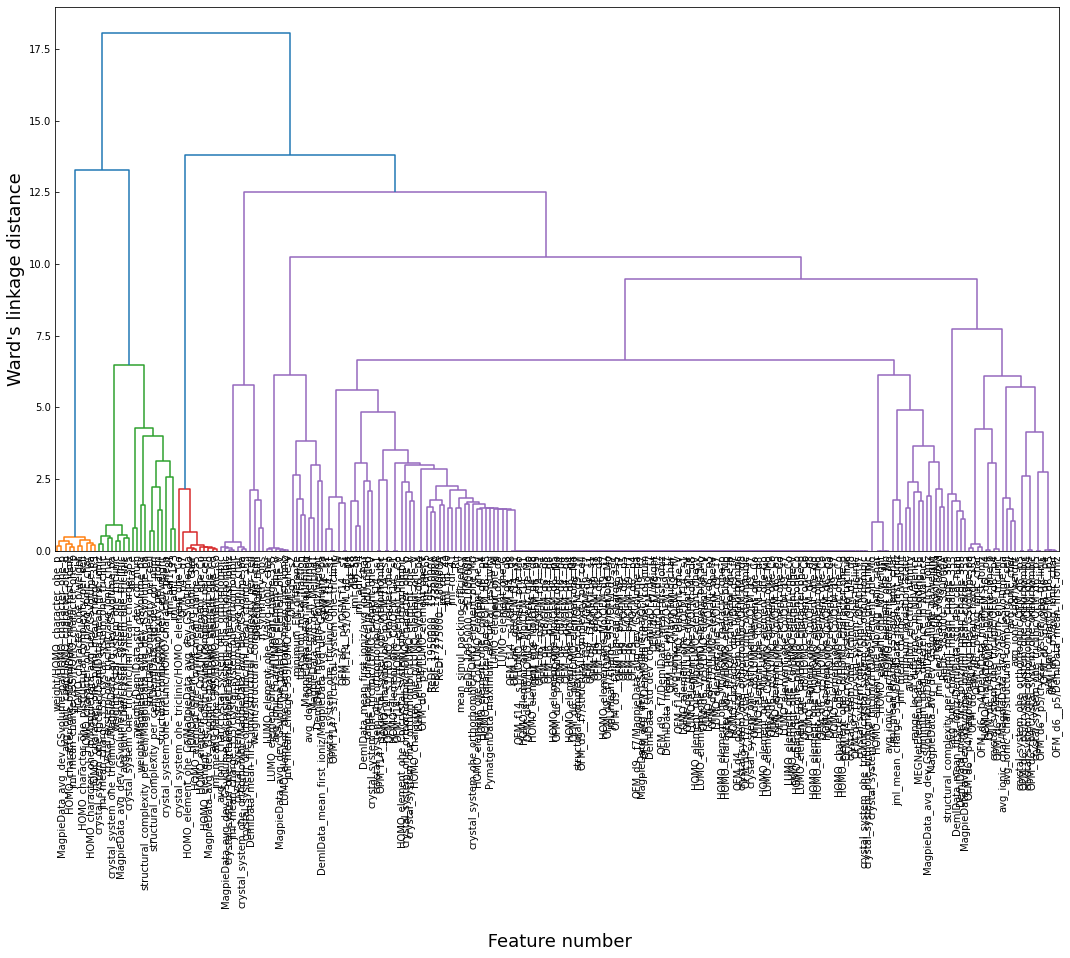

In [5]:
# Perform hierarchical cluster analysis & create the corresponding dendrogram 
data.hierarchical_cluster_analysis()

In [6]:
# Select features based on the given linkage threshold
threshold_list = [0.5, 1.5, 2, 2.5]

for i in threshold_list:
    final_features = data.apply_linkage_threshold(threshold = i)

Number of features remaining:  103
Features saved as features_selected_from_hierarchical_analysis_mag_order_threshold_0.5.pkl
Number of features remaining:  75
Features saved as features_selected_from_hierarchical_analysis_mag_order_threshold_1.5.pkl
Number of features remaining:  51
Features saved as features_selected_from_hierarchical_analysis_mag_order_threshold_2.pkl
Number of features remaining:  37
Features saved as features_selected_from_hierarchical_analysis_mag_order_threshold_2.5.pkl


In [7]:
# threshold_list = np.linspace(3, 4, 6)

# for i in threshold_list:
#     final_features = data.apply_linkage_threshold(threshold = i)

#### Test Dummy Model

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import jaccard_score, multilabel_confusion_matrix, roc_curve, roc_auc_score, \
                            auc, f1_score, classification_report, recall_score, precision_recall_curve, \
                            balanced_accuracy_score, confusion_matrix, accuracy_score, average_precision_score, \
                            hamming_loss, matthews_corrcoef

from lightgbm.sklearn import LGBMClassifier


In [2]:
# Target
target = 'mag_order'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/7. mag_order/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Data
df_train = joblib.load(path_to_save + 'df_train_' + target + '_engineered.pkl')
df_test = joblib.load(path_to_save + 'df_test_' + target + '_engineered.pkl')

problem = 'classification'

# Features 
features = joblib.load(path_to_save + 'features_selected_from_hierarchical_analysis_' + target + '_threshold_2.pkl')
len(features)

51

In [3]:
lgbm  = LGBMClassifier(
                        importance_type='gain',
                        objective='multiclass',
                        random_state=42,
                        learning_rate=0.1,
                        n_estimators=400,
                        num_leaves=40,
                        #target_classes=['Direct', 'Indirect']
                        )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMClassifier(importance_type='gain', n_estimators=400, num_leaves=40,
               objective='multiclass', random_state=42)

In [4]:
# Predict
y_pred = lgbm.predict_proba(df_test[features])
y_pred_2 = lgbm.predict(df_test[features])
y_test = df_test[target]

# Generate table of results

# micro, macro, weighted
strategy = 'weighted'

print('1. The F-1 score of the model {}\n'.format(f1_score(y_test.ravel(), y_pred_2, average=strategy)))
print('2. The recall score of the model {}\n'.format(recall_score(y_test.ravel(), y_pred_2, average=strategy)))
print('3. Classification report \n {} \n'.format(classification_report(y_test.ravel(), y_pred_2, 
                                                                    target_names=['FM', 'AFM', 'FiM'],
                                                                    digits=3)))
print('4. Classification report \n {} \n'.format(multilabel_confusion_matrix(y_test.ravel(), y_pred_2)))
print('5. Confusion matrix \n {} \n'.format(confusion_matrix(y_test.ravel(), y_pred_2)))
print('6. Accuracy score \n {} \n'.format(accuracy_score(y_test.ravel(), y_pred_2)))
print('7. Balanced accuracy score \n {} \n'.format(balanced_accuracy_score(y_test.ravel(), y_pred_2)))

1. The F-1 score of the model 0.7836651183761685

2. The recall score of the model 0.7845484221980413

3. Classification report 
               precision    recall  f1-score   support

          FM      0.775     0.676     0.722       173
         AFM      0.803     0.823     0.813       385
         FiM      0.769     0.795     0.782       361

    accuracy                          0.785       919
   macro avg      0.782     0.765     0.772       919
weighted avg      0.784     0.785     0.784       919
 

4. Classification report 
 [[[712  34]
  [ 56 117]]

 [[456  78]
  [ 68 317]]

 [[472  86]
  [ 74 287]]] 

5. Confusion matrix 
 [[117  24  32]
 [ 14 317  54]
 [ 20  54 287]] 

6. Accuracy score 
 0.7845484221980413 

7. Balanced accuracy score 
 0.7648970172756059 



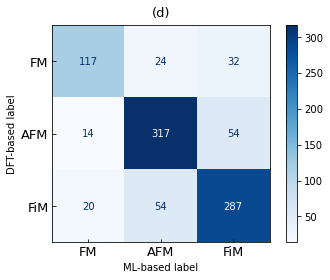

In [5]:
# np.set_printoptions(precision=2)
fontsize = 13
fontsize2 = 10

disp = plot_confusion_matrix(
                            lgbm, 
                            df_test[features], 
                            df_test[target],
                            display_labels=np.array(['FM', 'AFM', 'FiM'], dtype='<U10'),
                            cmap=plt.cm.Blues,
                            normalize=None
                            )

disp.ax_.set_title('(d)', fontsize=fontsize, y=1.01) 

plt.tick_params(axis='both', which='major', labelsize=fontsize, direction='in')
plt.xlabel('ML-based label', size=fontsize2)
plt.ylabel('DFT-based label', size=fontsize2)

# #Final_figure
# plt.savefig('confusion_matrix_v3.png', dpi = 500, bbox_inches="tight")

plt.show()

#### Recursive Feature Elimination

In [6]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import recursive_feature_elimination as rfe

import joblib
import pandas as pd

In [7]:
# Target
target = 'mag_order'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/7. mag_order/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Features 
features = joblib.load(path_to_save + 'features_selected_from_hierarchical_analysis_' + target + '_threshold_2.pkl')
print(len(features))

scaled = False

problem = 'classification'

51


In [8]:
# Initialize module with path_to_file and path_to_save
run = rfe.recursive_feature_elimination(
                                        path_to_file, 
                                        path_to_save, 
                                        target=target,
                                        features = features,
                                        scaled = False,
                                        problem = problem
                                        )

Target: mag_order
No. of features: 51


In [9]:
# Run RFE
estimator = run.base_model(boosting_method = 'lightGBM', objective='binary')
RFE_features = run.perform(cv_fold=10)

Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 fe

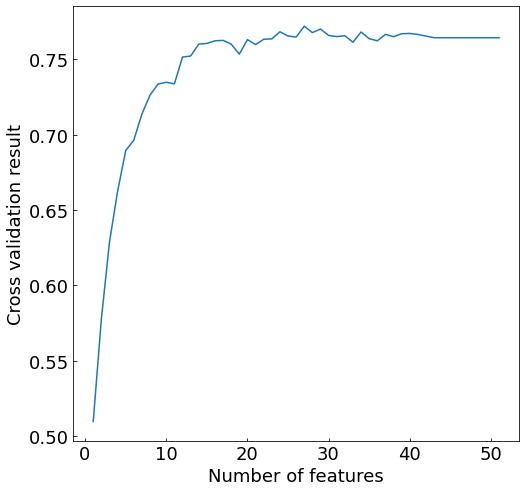

Figure saved as: RFE_plot_mag_order.png


In [11]:
# Plot figure
run.RFE_plot()

#### Bayesian Optimization 

In [12]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import optimization as opt

import joblib
import pandas as pd
import numpy as np

In [13]:
# Target
target = 'mag_order'

# Path
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/7. mag_order/'
path_to_save = path + target + '_results/'

# Path to training data
path_to_train_data = path_to_save + 'df_train_' + target + '_engineered.pkl'
path_to_test_data = path_to_save + 'df_test_' + target + '_engineered.pkl'
path_to_features = path_to_save + 'features_selected_from_RFE_' + target + '.pkl' 

problem = 'classification'

scaled = False

In [14]:
# Initialization
final_stage = opt.optimization(
                            path_to_train_data = path_to_train_data,
                            path_to_test_data = path_to_test_data,
                            path_to_save = path_to_save,
                            features = path_to_features,
                            target = target,
                            problem = problem,
                            scaled = scaled
                            )

Name of target column:  mag_order
No. of exploratory features:  27


In [15]:
# Choose ML model
final_stage.base_model(boosting_method = 'lightGBM', objective='binary')

LGBMClassifier(importance_type='gain', objective='binary', random_state=42)

In [16]:
# Define hyperparameters; range should be edited directly from the script
final_stage.set_hyperparameters()

(['learning_rate', 'n_estimators', 'num_leaves'],
 [Real(low=0.01, high=1.0, prior='log-uniform', transform='identity'),
  Integer(low=100, high=800, prior='uniform', transform='identity'),
  Integer(low=10, high=100, prior='uniform', transform='identity')])

In [17]:
# optimization_method: dummy_minimize, gp_minimize, gbrt_minimize, forest_minimize
final_stage.run(optimization_method = 'bayesian')

Iteration No: 1 started. Evaluating function at random point.

 {'learning_rate': 0.0785317308297857, 'n_estimators': 540, 'num_leaves': 95} 

Score:  -0.7552976484120982 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 6.5540
Function value obtained: -0.7553
Current minimum: -0.7553
Iteration No: 2 started. Evaluating function at random point.

 {'learning_rate': 0.10343114506089036, 'n_estimators': 352, 'num_leaves': 80} 

Score:  -0.7547530661126338 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 4.3129
Function value obtained: -0.7548
Current minimum: -0.7553
Iteration No: 3 started. Evaluating function at random point.

 {'learning_rate': 0.14594472366600866, 'n_estimators': 414, 'num_leaves': 81} 

Score:  -0.7605048948601406 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 3.8585
Function value obtained: -0.7605
Current minimum: -0.7605
Iteration No: 4 started. Evaluating function at random point.

 {'learning_rate'

Saved: Optimisation_result_mag_order.png


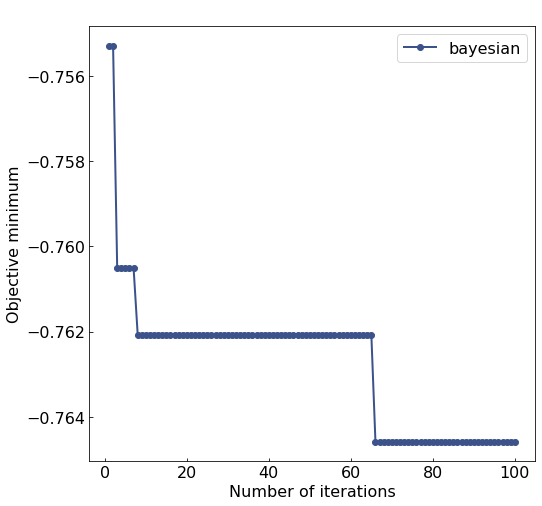

In [18]:
# Plot convergence plot
final_stage.convergence_plot()

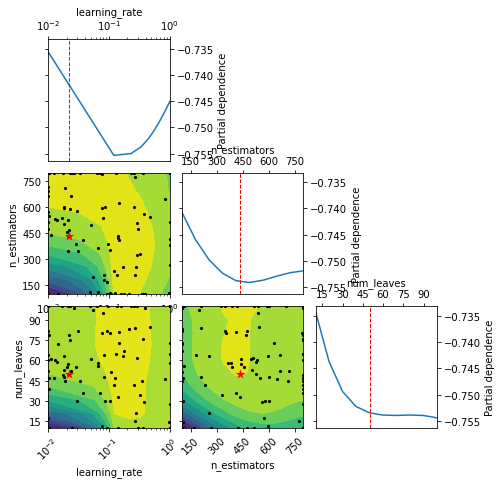

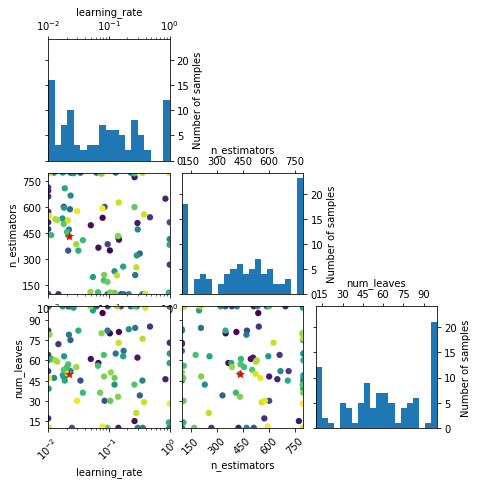

In [19]:
# objective and evaluation plot
final_stage.objective_plot()

In [20]:
# Train model with optimal hyperparameter identified
final_stage.train_model()

LGBMClassifier(importance_type='gain', learning_rate=0.02202236171439538,
               n_estimators=434, num_leaves=50, objective='binary',
               random_state=42)

1. The F-1 score of the model 0.7794085522776196

2. The recall score of the model 0.780195865070729

3. Classification report 
               precision    recall  f1-score   support

          FM       0.80      0.68      0.73       173
         AFM       0.79      0.81      0.80       385
         FiM       0.76      0.80      0.78       361

    accuracy                           0.78       919
   macro avg       0.78      0.76      0.77       919
weighted avg       0.78      0.78      0.78       919
 

4. Classification report 
 [[[716  30]
  [ 56 117]]

 [[452  82]
  [ 73 312]]

 [[468  90]
  [ 73 288]]] 

5. Confusion matrix 
 [[117  25  31]
 [ 14 312  59]
 [ 16  57 288]] 

6. Accuracy score 
 0.780195865070729 

7. Balanced accuracy score 
 0.7614913739807659 



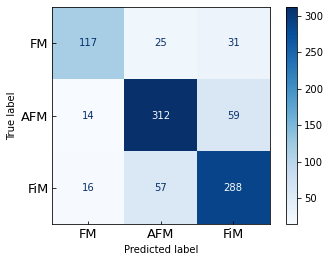

Saved: Confusion_matrix_mag_order.png


In [21]:
# Evaluate model using test set
final_stage.evaluate(
                    strategy='weighted', 
                    target_names=['FM', 'AFM', 'FiM']
                    )


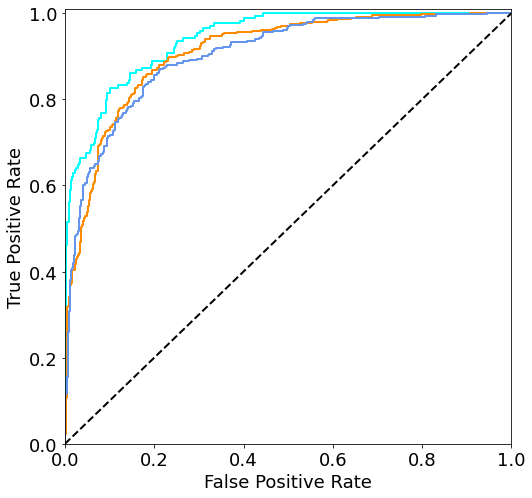

Saved: Receiver_operating_characteristic_curve_mag_order.png


In [24]:
# Evaluate model using test set
final_stage.ROC(
                overall_performance=False,
                )

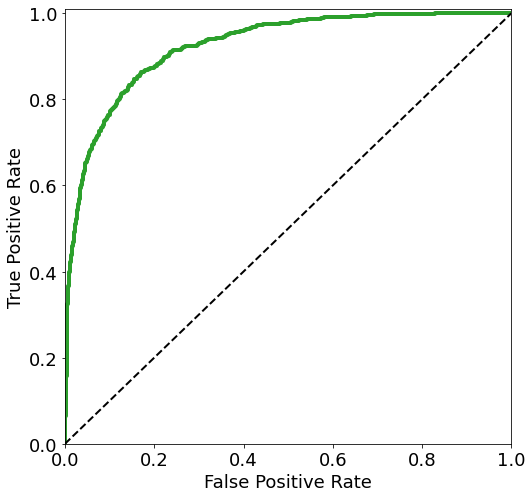

Saved: Receiver_operating_characteristic_curve_mag_order.png


In [27]:
# Evaluate model using test set
final_stage.ROC(
                overall_performance=True,
                strategy='micro'
                )

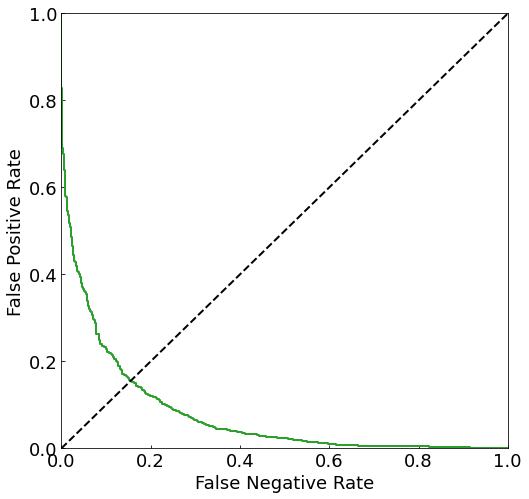

Saved: detection_error_tradeoff_curves_mag_order.png


In [29]:
# Evaluate model using test set
final_stage.DET(strategy='micro')

Average precision score, micro-averaged over all classes: 0.866
Average precision score, macro-averaged over all classes: 0.859
Average precision score, weighted-averaged over all classes: 0.865


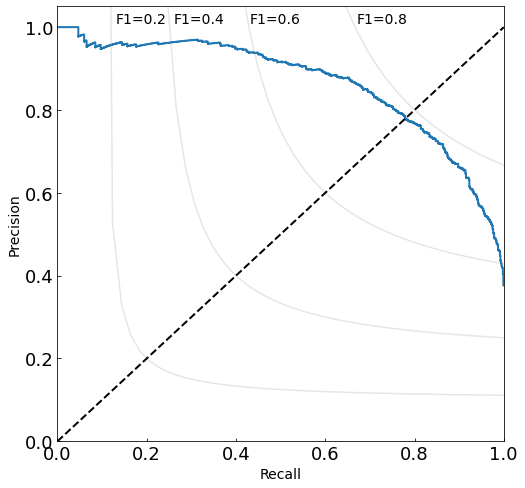

Saved: precision_recall_mag_order.png


In [30]:
# Evaluate model using test set
final_stage.PR()

### Final Figure

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import jaccard_score, multilabel_confusion_matrix, roc_curve, roc_auc_score, \
                            auc, f1_score, classification_report, recall_score, precision_recall_curve, \
                            balanced_accuracy_score, confusion_matrix, accuracy_score, average_precision_score, \
                            hamming_loss, matthews_corrcoef

from lightgbm.sklearn import LGBMClassifier


In [2]:
# Target
target = 'mag_order'

# Path
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/7. mag_order/'
path_to_save = path + target + '_results/'

# Path to training data
path_to_train_data = path_to_save + 'df_train_' + target + '_engineered.pkl'
path_to_test_data = path_to_save + 'df_test_' + target + '_engineered.pkl'
path_to_features = path_to_save + 'features_selected_from_RFE_' + target + '.pkl' 

problem = 'classification'

scaled = False

In [3]:
df_train = joblib.load(path_to_train_data)
df_test = joblib.load(path_to_test_data)

features = joblib.load(path_to_features)
len(features)

27

In [4]:
lgbm  = LGBMClassifier(
                        importance_type='gain',
                        objective='multiclass',
                        learning_rate=0.02202236171439538,
                        n_estimators=800,
                        num_leaves=69,
                        random_state=42
                        )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMClassifier(importance_type='gain', learning_rate=0.02202236171439538,
               n_estimators=800, num_leaves=69, objective='multiclass',
               random_state=42)

In [5]:
# Predict
y_pred = lgbm.predict_proba(df_test[features])
y_pred_2 = lgbm.predict(df_test[features])
y_test = df_test[target]

# Generate table of results

# micro, macro, weighted
strategy = 'weighted'

print('1. The F-1 score of the model {}\n'.format(f1_score(y_test.ravel(), y_pred_2, average=strategy)))
print('2. The recall score of the model {}\n'.format(recall_score(y_test.ravel(), y_pred_2, average=strategy)))
print('3. Classification report \n {} \n'.format(classification_report(y_test.ravel(), y_pred_2, 
                                                                    target_names=['FM', 'AFM', 'FiM'],
                                                                    digits=3)))
print('4. Classification report \n {} \n'.format(multilabel_confusion_matrix(y_test.ravel(), y_pred_2)))
print('5. Confusion matrix \n {} \n'.format(confusion_matrix(y_test.ravel(), y_pred_2)))
print('6. Accuracy score \n {} \n'.format(accuracy_score(y_test.ravel(), y_pred_2)))
print('7. Balanced accuracy score \n {} \n'.format(balanced_accuracy_score(y_test.ravel(), y_pred_2)))


1. The F-1 score of the model 0.7814172668567221

2. The recall score of the model 0.7823721436343852

3. Classification report 
               precision    recall  f1-score   support

          FM      0.795     0.671     0.727       173
         AFM      0.790     0.813     0.802       385
         FiM      0.769     0.803     0.786       361

    accuracy                          0.782       919
   macro avg      0.785     0.762     0.772       919
weighted avg      0.783     0.782     0.781       919
 

4. Classification report 
 [[[716  30]
  [ 57 116]]

 [[451  83]
  [ 72 313]]

 [[471  87]
  [ 71 290]]] 

5. Confusion matrix 
 [[116  27  30]
 [ 15 313  57]
 [ 15  56 290]] 

6. Accuracy score 
 0.7823721436343852 

7. Balanced accuracy score 
 0.7622771146412926 



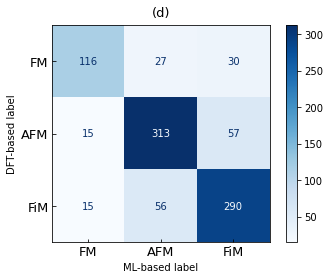

In [6]:
# np.set_printoptions(precision=2)
fontsize = 13
fontsize2 = 10

disp = plot_confusion_matrix(
                            lgbm, 
                            df_test[features], 
                            df_test[target],
                            display_labels=np.array(['FM', 'AFM', 'FiM'], dtype='<U10'),
                            cmap=plt.cm.Blues,
                            normalize=None
                            )

disp.ax_.set_title('(d)', fontsize=fontsize, y=1.01) 

plt.tick_params(axis='both', which='major', labelsize=fontsize, direction='in')
plt.xlabel('ML-based label', size=fontsize2)
plt.ylabel('DFT-based label', size=fontsize2)

# #Final_figure
# plt.savefig('confusion_matrix_v3.png', dpi = 500, bbox_inches="tight")

plt.show()

In [7]:
df_test.groupby([target]).count()

,minimum_oxidation_state,maximum_oxidation_state,range_oxidation_state,std_dev_oxidation_state,compound_possible,max_ionic_char,avg_ionic_char,avg_anion_electron_affinity,minimum_EN_difference,maximum_EN_difference,...,HOMO_element_ohe_Mo/OFM_f14__s1,OFM_f14__s1/HOMO_element_ohe_Mo,HOMO_element_ohe_Mo/structural_complexity_per_cell,structural_complexity_per_cell/HOMO_element_ohe_Mo,OFM_d4__d8/OFM_f14__s1,OFM_f14__s1/OFM_d4__d8,OFM_d4__d8/structural_complexity_per_cell,structural_complexity_per_cell/OFM_d4__d8,OFM_f14__s1/structural_complexity_per_cell,structural_complexity_per_cell/OFM_f14__s1
mag_order,,,,,,,,,,,,,,,,,,,,,
0,173,173,173,173,173,173,173,173,173,173,...,173,173,173,173,173,173,173,173,173,173
1,385,385,385,385,385,385,385,385,385,385,...,385,385,385,385,385,385,385,385,385,385
2,361,361,361,361,361,361,361,361,361,361,...,361,361,361,361,361,361,361,361,361,361


[Text(0.5, 0, 'Relevance score'), Text(0, 0.5, 'Feature')]

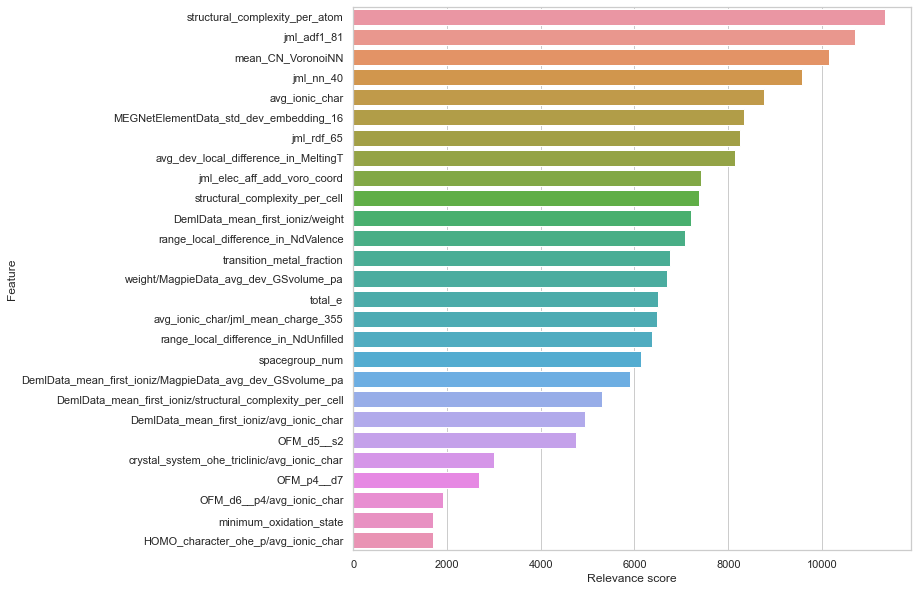

In [8]:
import seaborn as sns
# Generate feature ranking
model = lgbm

feature_score = pd.DataFrame({'feature': features, 'relevance_score': model.feature_importances_})
feature_score = feature_score.sort_values(by = 'relevance_score', ascending = False)
feature_score = feature_score.reset_index(drop = True)

#Plot data of feature relevance 
sns.set(rc = {'figure.figsize':(10, 10)})
sns.set_style("whitegrid")

# Number of features to plot
no_of_features = 30

fig = sns.barplot(x = 'relevance_score', y = 'feature', data = feature_score[:no_of_features])
fig.set(xlabel = 'Relevance score', ylabel = 'Feature')

# plt.savefig('feature_relevance_plot_experimental_bayesian_scaffold_split_v2.png', dpi = 300)